In [1]:
import sympy as sp
import numpy as np
from sympy.physics.vector import dynamicsymbols
from sympy.physics.vector import time_derivative
from sympy.physics.vector import ReferenceFrame
N = ReferenceFrame('N')
import pylab as pl
import control
from EoM import *
from sympy.physics.mechanics import *
from numpy.linalg import matrix_rank, eig

In [2]:
I_b, I_w, m_b, m_w, r, l_cg, l_f, f_d, f_w, T_w, g = sp.symbols('I_b, I_w, m_b, m_w, r, l_cg, l_f, f_d, f_w, T_w, g')
theta, phi = dynamicsymbols('theta, phi')

phid = phi.diff()
phidd = phid.diff()
thetad = theta.diff()
thetadd = thetad.diff()

q = sp.Matrix([[phi], [theta]])
qd = q.diff()
qdd = qd.diff()

u = sp.Matrix([T_w])

tau = sp.Matrix([[((m_w+m_b)*r**2 + I_w)*phidd + m_b*r*l_cg*thetadd*sp.cos(theta) - m_b*r*l_cg*thetad**2 * sp.sin(theta) - f_d*r - T_w],
                 [(I_b + m_b*l_cg**2)*thetadd + m_b*r*l_cg*sp.cos(theta)*phidd - m_b*g*l_cg*sp.sin(theta) - f_d*l_f*sp.cos(theta) + T_w]])

In [3]:
tau

Matrix([
[-T_w - f_d*r - l_cg*m_b*r*sin(theta(t))*Derivative(theta(t), t)**2 + l_cg*m_b*r*cos(theta(t))*Derivative(theta(t), (t, 2)) + (I_w + r**2*(m_b + m_w))*Derivative(phi(t), (t, 2))],
[                 T_w - f_d*l_f*cos(theta(t)) - g*l_cg*m_b*sin(theta(t)) + l_cg*m_b*r*cos(theta(t))*Derivative(phi(t), (t, 2)) + (I_b + l_cg**2*m_b)*Derivative(theta(t), (t, 2))]])

In [4]:
zero_point = {f_d:0}
tau_sum = tau[0] + tau[1]
tau_sum = sp.simplify(tau_sum.subs(zero_point))
tau_sum

-g*l_cg*m_b*sin(theta(t)) - l_cg*m_b*r*sin(theta(t))*Derivative(theta(t), t)**2 + l_cg*m_b*r*cos(theta(t))*Derivative(phi(t), (t, 2)) + l_cg*m_b*r*cos(theta(t))*Derivative(theta(t), (t, 2)) + (I_b + l_cg**2*m_b)*Derivative(theta(t), (t, 2)) + (I_w + r**2*(m_b + m_w))*Derivative(phi(t), (t, 2))

In [5]:
eq_point = {sp.sin(theta):theta, sp.cos(theta):1, thetad**2:0, f_d:0}
tau_eq = sp.simplify(tau.subs(eq_point))
tau_eq

Matrix([
[                -T_w + l_cg*m_b*r*Derivative(theta(t), (t, 2)) + (I_w + r**2*(m_b + m_w))*Derivative(phi(t), (t, 2))],
[T_w - g*l_cg*m_b*theta(t) + l_cg*m_b*r*Derivative(phi(t), (t, 2)) + (I_b + l_cg**2*m_b)*Derivative(theta(t), (t, 2))]])

In [6]:
Ml, Cl, Gl, Wl = get_EoM_from_T(tau_eq,qdd,g,u)
Cl

Matrix([
[0],
[0]])

In [7]:
Ml

Matrix([
[I_w + r**2*(m_b + m_w),        l_cg*m_b*r],
[            l_cg*m_b*r, I_b + l_cg**2*m_b]])

In [8]:
Gl

Matrix([
[                   0],
[-g*l_cg*m_b*theta(t)]])

In [9]:
m_cmg = 4*2+1*2+2.84

m_f = 8
m_g = 2
m = 2.84

l_f = 0.2222
l_g = 0.2222
l = 0.2222-0.05

l_c = (m_f*l_f+m_g*l_g + m*l)/m_cmg
l_c

I_f = 0.022599998
I_g = 0.007979344
I = 0.062838135

I_c = I_f + I_g + I + 2 * m_f*(l_c-l_f)**2 + 2* m_g*(l_c-l_g)**2 + m*(l_c-l)**2

l_c

0.21114080996884735

In [10]:
I_c

0.10017012885702778

In [11]:
#무게중심_아래부터_위까지
m1 = 0.52           # ankle_wheel
m2 = 2.386          # ankle_roll_pitch
m3 = 1.231          # ankle_knee
m4 = 2.175          # knee_hip
m5 = 3.325          # hip_roll_pitch
m6 = 4*2+1*2+2.84   # cmg

l1 = 0.0087
l2 = 0.171
l3 = 0.171+0.159782
l4 = 0.171+0.279942+0.15984
l5 = 0.171+0.279942+0.28
l6 = 0.171+0.279942+0.28+0.21114

m_bb = 22.447

I_1 = 0.002508274
I_2 =0.004226334
I_3 =0.008343955
I_4 =0.006609551
I_5 = 0.006554912
I_6 = 0.10017012885702778

l_bb = (m1*l1 + m2*l2 + m3*l3 + m4*l4 + m5*l5 + m6*l6)/m_bb
l_bb

I_bb = I_1 + I_2 + I_3 + I_4 + I_5 + I_6 +  m1*(l_bb-l1)**2 +  m2*(l_bb-l2)**2 +  m3*(l_bb-l3)**2 +  m4*(l_bb-l4)**2 +  m5*(l_bb-l5)**2 +  m6*(l_bb-l6)**2
l_bb


0.7428559950995679

In [12]:
I_bb

1.9460274096682204

In [13]:

0.7428559950995679

In [14]:
Mlp_inv = Mlp.inv()
qdd_rhs_A = Mlp_inv*(-Clp -Glp)
qdd_rhs_B = Mlp_inv*Wlp*u

In [15]:
X = q.col_join(qd)
Xd_A = qd.col_join(qdd_rhs_A)
Xd_B = qd.col_join(qdd_rhs_B)
U = u

In [16]:
A = Xd_A.jacobian(X)
B = Xd_B.jacobian(U)
C = X.jacobian(X)
D = X.jacobian(U)

In [16]:
A

Matrix([
[0,                 0, 1, 0],
[0,                 0, 0, 1],
[0, -435.011562021848, 0, 0],
[0,   46.341166332886, 0, 0]])

In [17]:
ss0 = [A, B, C, D]
sys0 = control.ss(*[pl.array(mat_i.subs(param)).astype(float) for mat_i in ss0])
mprint(sys0)

A = [[   0.            0.            1.            0.        ]
     [   0.            0.            0.            1.        ]
     [   0.         -435.01156202    0.            0.        ]
     [   0.           46.34116633    0.            0.        ]]

B = [[ 0.        ]
     [ 0.        ]
     [35.73360799]
     [-2.93867428]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]
     [0.]]



In [20]:
import state_equation_pitch as sep

A, B, C, D = sep.Cal_Pitch_SS(0.8)
A, B, C, D

(Matrix([
 [0,                 0, 1, 0],
 [0,                 0, 0, 1],
 [0, -470.712155322611, 0, 0],
 [0,  46.5624923763365, 0, 0]]),
 Matrix([
 [                0],
 [                0],
 [ 37.7922526368764],
 [-2.93240434031029]]),
 Matrix([
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1]]),
 Matrix([
 [0],
 [0],
 [0],
 [0]]))

In [19]:
matrix_rank(control.obsv(A,C))

4

In [20]:
matrix_rank(control.ctrb(A,C))

4

In [18]:
sys0_output = sys0[2,0]
mprint(sys0_output)
tf_20 = tf_clean(control.minreal(control.ss2tf(sys0_output)))
tf_20

A = [[   0.            0.            1.            0.        ]
     [   0.            0.            0.            1.        ]
     [   0.         -435.01156202    0.            0.        ]
     [   0.           46.34116633    0.            0.        ]]

B = [[ 0.        ]
     [ 0.        ]
     [35.73360799]
     [-2.93867428]]

C = [[0. 0. 1. 0.]]

D = [[0.]]

0 states have been removed from the model


TransferFunction(array([  35.73360799,    0.        , -377.57978179]), array([  1.        ,   0.        , -46.34116633,   0.        ]))

In [11]:
eig(np.array(A, dtype=float))

(array([ 0.       ,  0.       ,  4.2050835, -4.2050835]),
 array([[ 1.00000000e+000, -1.00000000e+000, -2.29712214e-001,
          2.29712214e-001],
        [ 0.00000000e+000,  0.00000000e+000,  2.75258921e-002,
         -2.75258921e-002],
        [ 0.00000000e+000,  4.00833672e-292, -9.65959041e-001,
         -9.65959041e-001],
        [ 0.00000000e+000,  0.00000000e+000,  1.15748675e-001,
          1.15748675e-001]]))

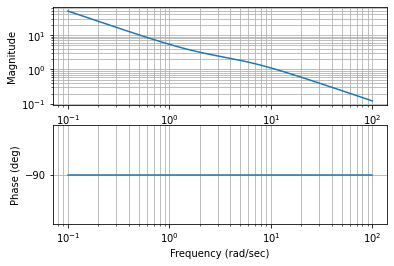

In [12]:
control.bode(tf_20);

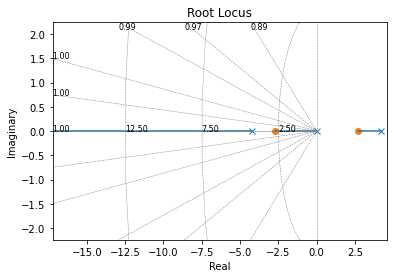

In [13]:
control.rlocus(tf_20);

In [14]:
mprint(sys0)

A = [[   0.            0.            1.            0.        ]
     [   0.            0.            0.            1.        ]
     [   0.         -147.56791173    0.            0.        ]
     [   0.           17.68272722    0.            0.        ]]

B = [[ 0.        ]
     [ 0.        ]
     [12.19453303]
     [-0.86036235]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]
     [0.]]



[[  -38.72983347 -1917.44494383   -39.05984358  -706.49779349]]
A = [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
     [ 4.72292234e+02  2.32347778e+04  4.76316553e+02  8.61541068e+03]
     [-3.33216906e+01 -1.63201471e+03 -3.36056188e+01 -6.07844103e+02]]

B = [[ 0.        ]
     [ 0.        ]
     [12.19453303]
     [-0.86036235]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]
     [0.]]



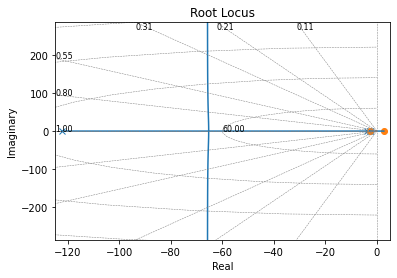

In [15]:
Q = sp.Matrix([ [15,0,0,0],
                [0,15,0,0],
                [0,0,1,0],
                [0,0,0,1]])
R = sp.Matrix([ [0.01] ])

K, S, E = control.lqr(sys0.A, sys0.B, Q, R)

print(K)


sysc = sys0.feedback(K)
mprint(sysc)
control.rlocus(sysc);

In [16]:
A = np.array([[0,0,1,0],
              [0,0,0,1],
              [0,-661.85402,0,0],
              [0,79.30846185,0,0]])
B = np.array([[0],[0],[37.21739289],[-3.85879473]])

C = np.eye(4)

D = np.array([[0], [0], [0], [0]])

A-B*K

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 1.44142343e+03,  7.07004478e+04,  1.45370554e+03,
         2.62940060e+04],
       [-1.49450477e+02, -7.31971798e+03, -1.50723919e+02,
        -2.72622996e+03]])

In [17]:
sysc.A

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 4.72292234e+02,  2.32347778e+04,  4.76316553e+02,
         8.61541068e+03],
       [-3.33216906e+01, -1.63201471e+03, -3.36056188e+01,
        -6.07844103e+02]])

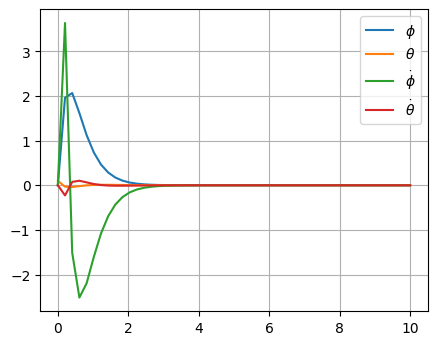

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

x0 = [0, 0.1, 0, 0]
u = 0
dt = 0.1
tf = 10

t, y = control.forced_response(sysc, X0=x0, T=pl.linspace(0,tf), transpose=True)


plt.figure(1, figsize=(5,4), dpi=100)
plt.plot(t, y);
plt.legend([r'$\phi$',r'$\theta$',r'$\dot\phi$',r'$\dot\theta$'], loc='best')
plt.grid()

In [49]:
K @ x0

array([-13.1184506])

In [20]:
# Rough 한 조건식
vmax_ = 22/3.6
t_ = 20 #sec

target_pos = vmax_*t_
v = vmax_/target_pos
a = v/4
a

0.0125

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.98692810e-04,  1.79738562e-01,  1.79738562e+01],
       [ 3.59477124e-03,  3.59477124e-01,  1.79738562e+01],
       ...,
       [ 1.43790490e+03,  3.59477124e-01, -1.79738562e+01],
       [ 1.43790760e+03,  1.79738562e-01, -1.79738562e+01],
       [ 1.43790760e+03,  1.79738562e-01, -1.79738562e+01]])

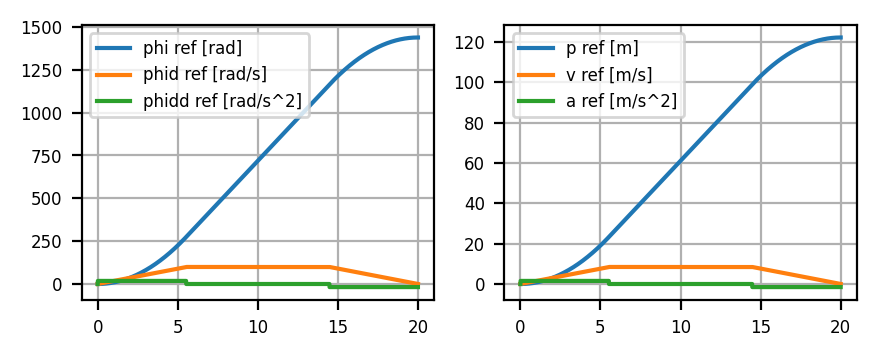

In [69]:
t_s, traj_s = Trapezoidal_Traj_Gen_Given_Amax_and_T(a,t_,0.01)
phi_traj = traj_s/ 0.085

rad2deg = 180/np.pi
pl.figure(1, figsize=(5,4), dpi=200)

pl.subplot(221);
pl.plot(t_s, phi_traj*target_pos)
pl.legend(['phi ref [rad]', 'phid ref [rad/s]', 'phidd ref [rad/s^2]'], loc='best')
pl.grid()

pl.subplot(222);
pl.plot(t_s, traj_s*target_pos)
pl.legend(['p ref [m]', 'v ref [m/s]', 'a ref [m/s^2]'], loc='best')
pl.grid()

phi_traj*target_pos
# print('Vmax :', max(traj_s[:,1])*target_pos*3.6, 'km/r and Amax:', max(traj_s[:,2])*target_pos/9.81, 'g')

In [54]:
phi_des = phi_traj[:,0]*target_pos
phidot_des = phi_traj[:,1]*target_pos
zeros = np.zeros(len(traj_s))
Phides = phi_des
Phides = np.vstack((Phides, zeros)) 
Phides = np.vstack((Phides, phidot_des))
Phides = np.vstack((Phides, zeros))

Phides.shape, Phides

((4, 2001),
 array([[0.00000000e+00, 8.98692810e-04, 3.59477124e-03, ...,
         1.43790490e+03, 1.43790760e+03, 1.43790760e+03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.79738562e-01, 3.59477124e-01, ...,
         3.59477124e-01, 1.79738562e-01, 1.79738562e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

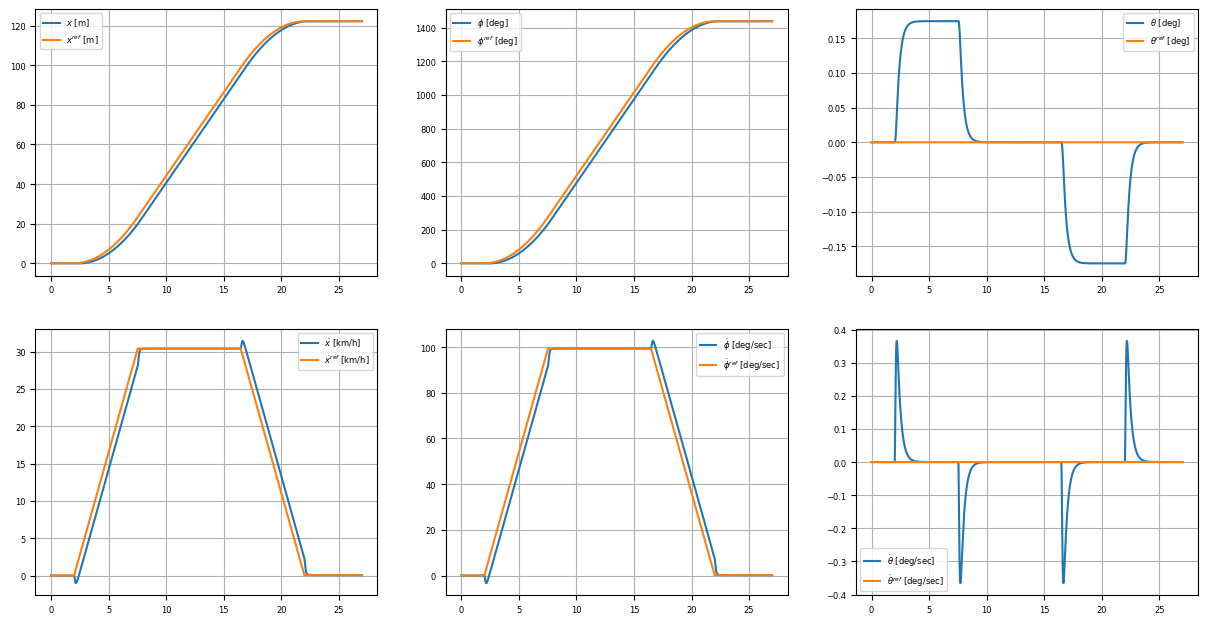

In [55]:
# Closed-loop Simulation
ss = sys0

rad2deg = 180/np.pi

def simulate_model_closed(X0, Xdes, K_gain, time_array, dt):
    Aop = ss.A
    Bop = ss.B
        
    t = 0
    j = 0
    X = Xref = Xd_prev = Xd = X0
    
    t_save = [0]
    x_save = xref_save = np.array([0,0,0,0])
    u_save = np.array([0])
    
    for i in range(len(time_array)):
        t = time_array[i]
         
        if t<2:
            Xref = X0       
        elif t>=2 and j<(Xdes.shape[1]):
            Xref = Xdes[:,j]
            j+=1
        else:
            Xdes_final = Xdes[:,Xdes.shape[1]-1]
            Xdes_final[1] = 0 # force to set xl_des as 0
            Xref = Xdes_final
        #print(t,j)
        # full-state feedback
        #u = K@(Xgoal - X)

        # partial feedback
        u1 = K_gain[0][1:]@(Xref[1:] - X[1:])
        #u2 = K_gain[1][1:]@(Xref[1:] - X[1:])
        
        # Forward Dynamics
        #Xd_prev = Xd
        # Linear Model
        u = np.array([u1])
        Xd = Aop@X + Bop@u # Xd = [xd, x_ld, thetad, xdd, x_ldd, thetadd]
        # NonLinear Model
        #q_qd = {x:X[0], x_l:X[1], theta:X[2], x.diff():X[3], x_l.diff():X[4], theta.diff():X[5]}
        #q_qd[F] = u1
        #q_qd[F_l] = u2
        #qdd = msubs(qdd_rhs_A_nonL,q_qd) + msubs(qdd_rhs_B_nonL,q_qd)
        #Xd = np.array([X[3], X[4], X[5], float(qdd[0]), float(qdd[1]), float(qdd[2])])
        
        t_save = np.vstack((t_save, t))
        x_save = np.vstack((x_save, X))
        xref_save = np.vstack((xref_save, Xref))
        u_save = np.vstack((u_save, np.array([u1])))
        
        X = X + Xd*dt        
        i+=1
       
        #limit setting
        xl_limit = 0.5
        if  X[1] >= xl_limit:
            X[1] = xl_limit
        elif X[1] <= -xl_limit:
            X[1] = -xl_limit
                 
    return t_save, x_save, xref_save, u_save

# initial condition
# [x, theta, x_dot, theta_dot]
X0 = np.array([0,0,0,0])

tf = 20 + 7
dt = 0.01
N = int(tf/dt)

# time points
t = np.linspace(0,tf,N)

# simulation
t_sim, x_sim, xref_sim, u_sim = simulate_model_closed(X0, Phides, K, t, dt)

pl.figure(1, figsize=(15,12), dpi=100)

pl.subplot(331);
pl.plot(t_sim, x_sim[:,0]*0.085, t_sim, xref_sim[:,0]*0.085);
pl.legend([r'$x$ [m]', r'$x^{ref}$ [m]'], loc='best')
pl.grid()

pl.subplot(332);
pl.plot(t_sim, x_sim[:,0], t_sim, xref_sim[:,0]);
pl.legend([r'$\phi$ [deg]', r'$\phi^{ref}$ [deg]'], loc='best')
pl.grid()

pl.subplot(333);
pl.plot(t_sim, x_sim[:,1], t_sim, xref_sim[:,1]);
pl.legend([r'$\theta$ [deg]', r'$\theta^{ref}$ [deg]'], loc='best')
pl.grid()

pl.subplot(334);
pl.plot(t_sim, x_sim[:,2]*0.085*3.6, t_sim, xref_sim[:,2]*0.085*3.6);
pl.legend([r'$\dotx$ [km/h]', r'$\dotx^{ref}$ [km/h]'], loc='best')
pl.grid()

pl.subplot(335);
pl.plot(t_sim, x_sim[:,2], t_sim, xref_sim[:,2]);
pl.legend([r'$\dot\phi$ [deg/sec]', r'$\dot\phi^{ref}$ [deg/sec]'], loc='best')
pl.grid()

pl.subplot(336);
pl.plot(t_sim, x_sim[:,3], t_sim, xref_sim[:,3]);
pl.legend([r'$\dot\theta$ [deg/sec]', r'$\dot\theta^{ref}$ [deg/sec]'], loc='best')
pl.grid()

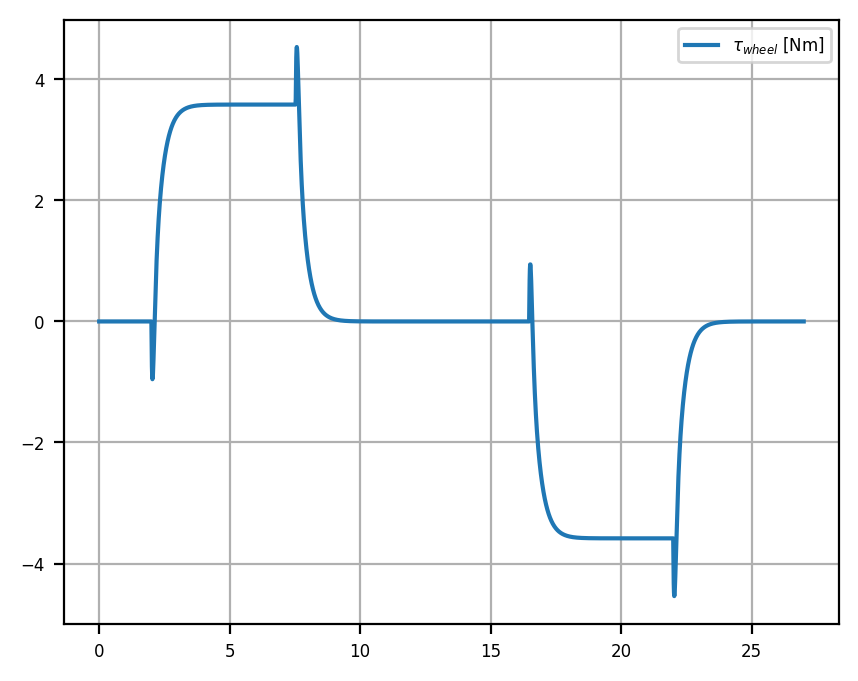

In [56]:
pl.figure(1, figsize=(5,4), dpi=200)
pl.plot(t_sim, u_sim);
pl.legend([r'$\tau_{wheel}$ [Nm]'], loc='best')
pl.grid()


In [57]:
# body size
param['body_width'] = 0.127 #0.5
param['body_height'] = 1.201442 #0.25

In [65]:
x_sim[:,3]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       7.84072105e-08, 7.59048075e-08, 7.34822699e-08])

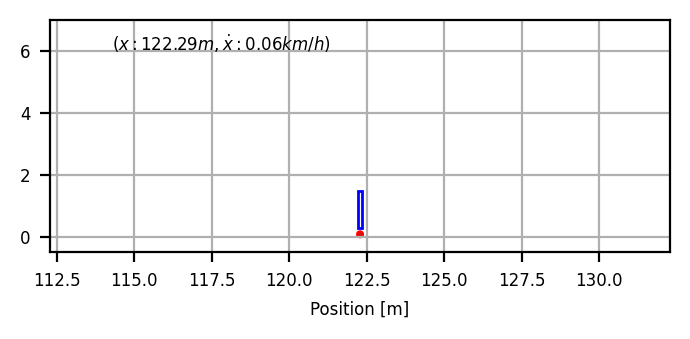

In [59]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(3, figsize=(4,2), dpi=200)
ax = plt.axes()
plt.rcParams['font.size'] = '6'

data = x_sim

def draw_model(time):
    ax.cla()
    
    frame = time*10
    
    x = data[frame, 0]*0.085
    xdot = data[frame, 2] *0.085
    th_rad = data[frame,1]
    th_deg = -data[frame,1]*180/np.pi
    #print(x)
    radius = param[r]
    
    # configure
    x_wheel = x
    y_wheel = radius
       
    x_body = x + (param[l_cg] - param['body_height']/2)*np.sin(th_rad) - param['body_width']/2*np.cos(th_rad)
    y_body = radius + (param[l_cg] - param['body_height']/2)*np.cos(th_rad) + param['body_width']/2*np.sin(th_rad)
    
    # wheel
    ax.add_patch(
        patches.Circle((x_wheel, y_wheel), 
                       radius,
                       edgecolor = 'red',
                       facecolor = 'brown',
                       fill=True,))
    
    # body
    ax.add_patch(
        patches.Rectangle((x_body, y_body), 
                          param['body_width'], param['body_height'], th_deg,
                          edgecolor = 'blue',
                          facecolor = 'lightgray',
                          fill=False,))
    
    # data show up
    ax.text(x-8, 6, 
            r'$(x:{%s}m, \dotx:{%s}km/h)$' % (format(x,'.2f'), format(xdot*3.6,'.2f')))
    # ax.text(x-8, 5,        
    #         r'$(x_l:{%s}m, \theta:{%s}deg)$' % (format(-xl,'.2f'), format(-th_deg,'.2f')))
     
    ax.set_aspect('equal')
    ax.set_xlim([-10+x,10+x])
    ax.set_ylim([-0.5,7])
    ax.grid(axis='both')
    ax.set_xlabel('Position [m]', fontsize=6)

    time += 1 

anim = FuncAnimation(fig, draw_model, frames=int(len(t)/10), interval=100)
HTML(anim.to_html5_video())
anim.save("pitch_balancing.mp4",fps=20, dpi=200)
